<a href="https://colab.research.google.com/github/f8sle/report/blob/main/9%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

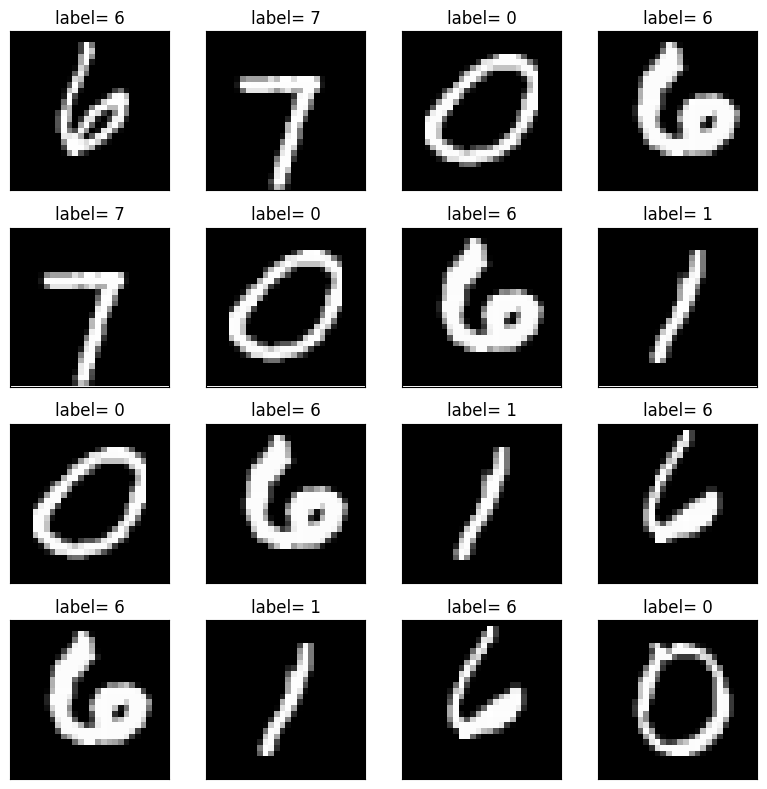

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy is 0.918
Correctly predicted images:


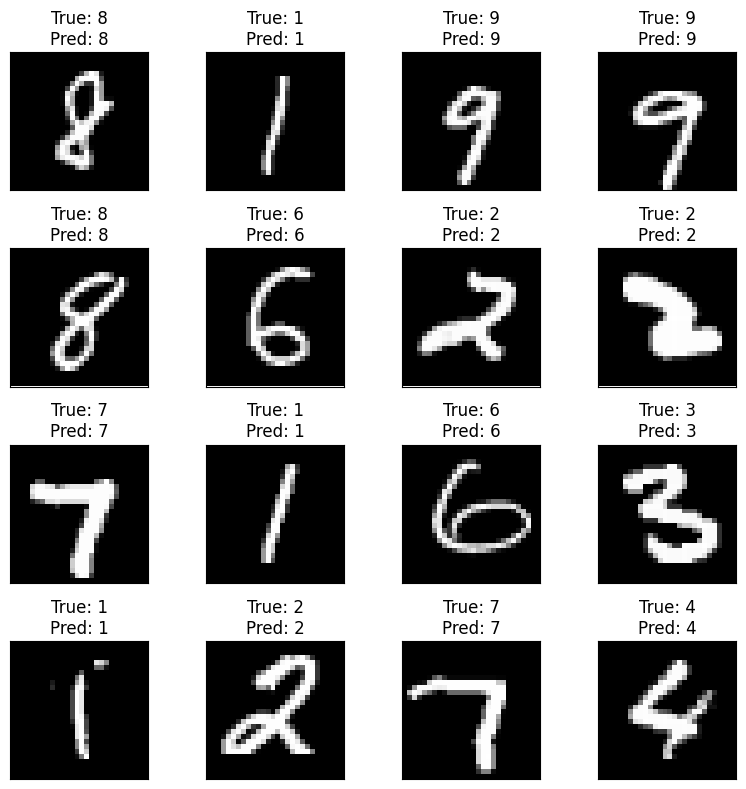

Incorrectly predicted images:


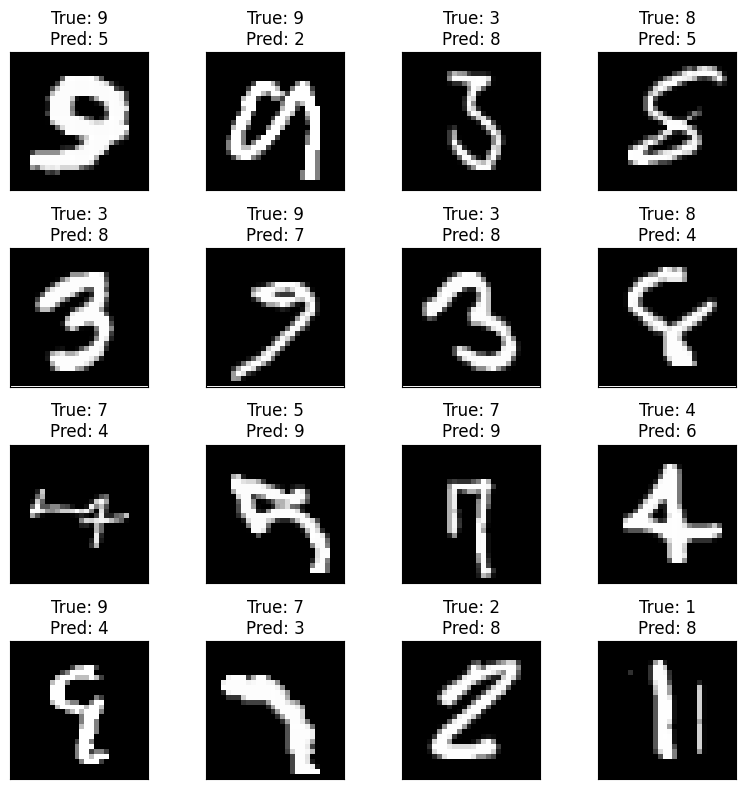

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train (1).csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')


X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


X_test = test_data.values


fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j * 4
        ax[i, j].imshow(X_train[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label= %s' % (y_train[idx]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()


clf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='multinomial', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                        warm_start=False)
clf.fit(X_train, y_train)


y_val_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Model accuracy is %0.3f" % (accuracy))


print("Correctly predicted images:")
correct_mask = (y_val == y_val_pred)
X_val_correct = X_val[correct_mask, :]
y_val_correct = y_val[correct_mask]
y_val_pred_correct = y_val_pred[correct_mask]


fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        if idx < len(X_val_correct):
            ax[i, j].imshow(X_val_correct[idx].reshape(28, 28), cmap='gray')
            ax[i, j].set_title('True: %s\nPred: %s' % (y_val_correct[idx], y_val_pred_correct[idx]))
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()


print("Incorrectly predicted images:")
incorrect_mask = (y_val != y_val_pred)
X_val_incorrect = X_val[incorrect_mask, :]
y_val_incorrect = y_val[incorrect_mask]
y_val_pred_incorrect = y_val_pred[incorrect_mask]


fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        if idx < len(X_val_incorrect):
            ax[i, j].imshow(X_val_incorrect[idx].reshape(28, 28), cmap='gray')
            ax[i, j].set_title('True: %s\nPred: %s' % (y_val_incorrect[idx], y_val_pred_incorrect[idx]))
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
plt.tight_layout()
plt.show()


preds = clf.predict(X_test)


sample_submission = pd.DataFrame({'ImageId': range(1, len(preds) + 1), 'Label': preds})
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/sample/sample_submission.csv', index=False)